In [454]:
#Q1.delivery_time

In [455]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [456]:
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [457]:
#Correlation analysis
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: ylabel='Sorting Time'>

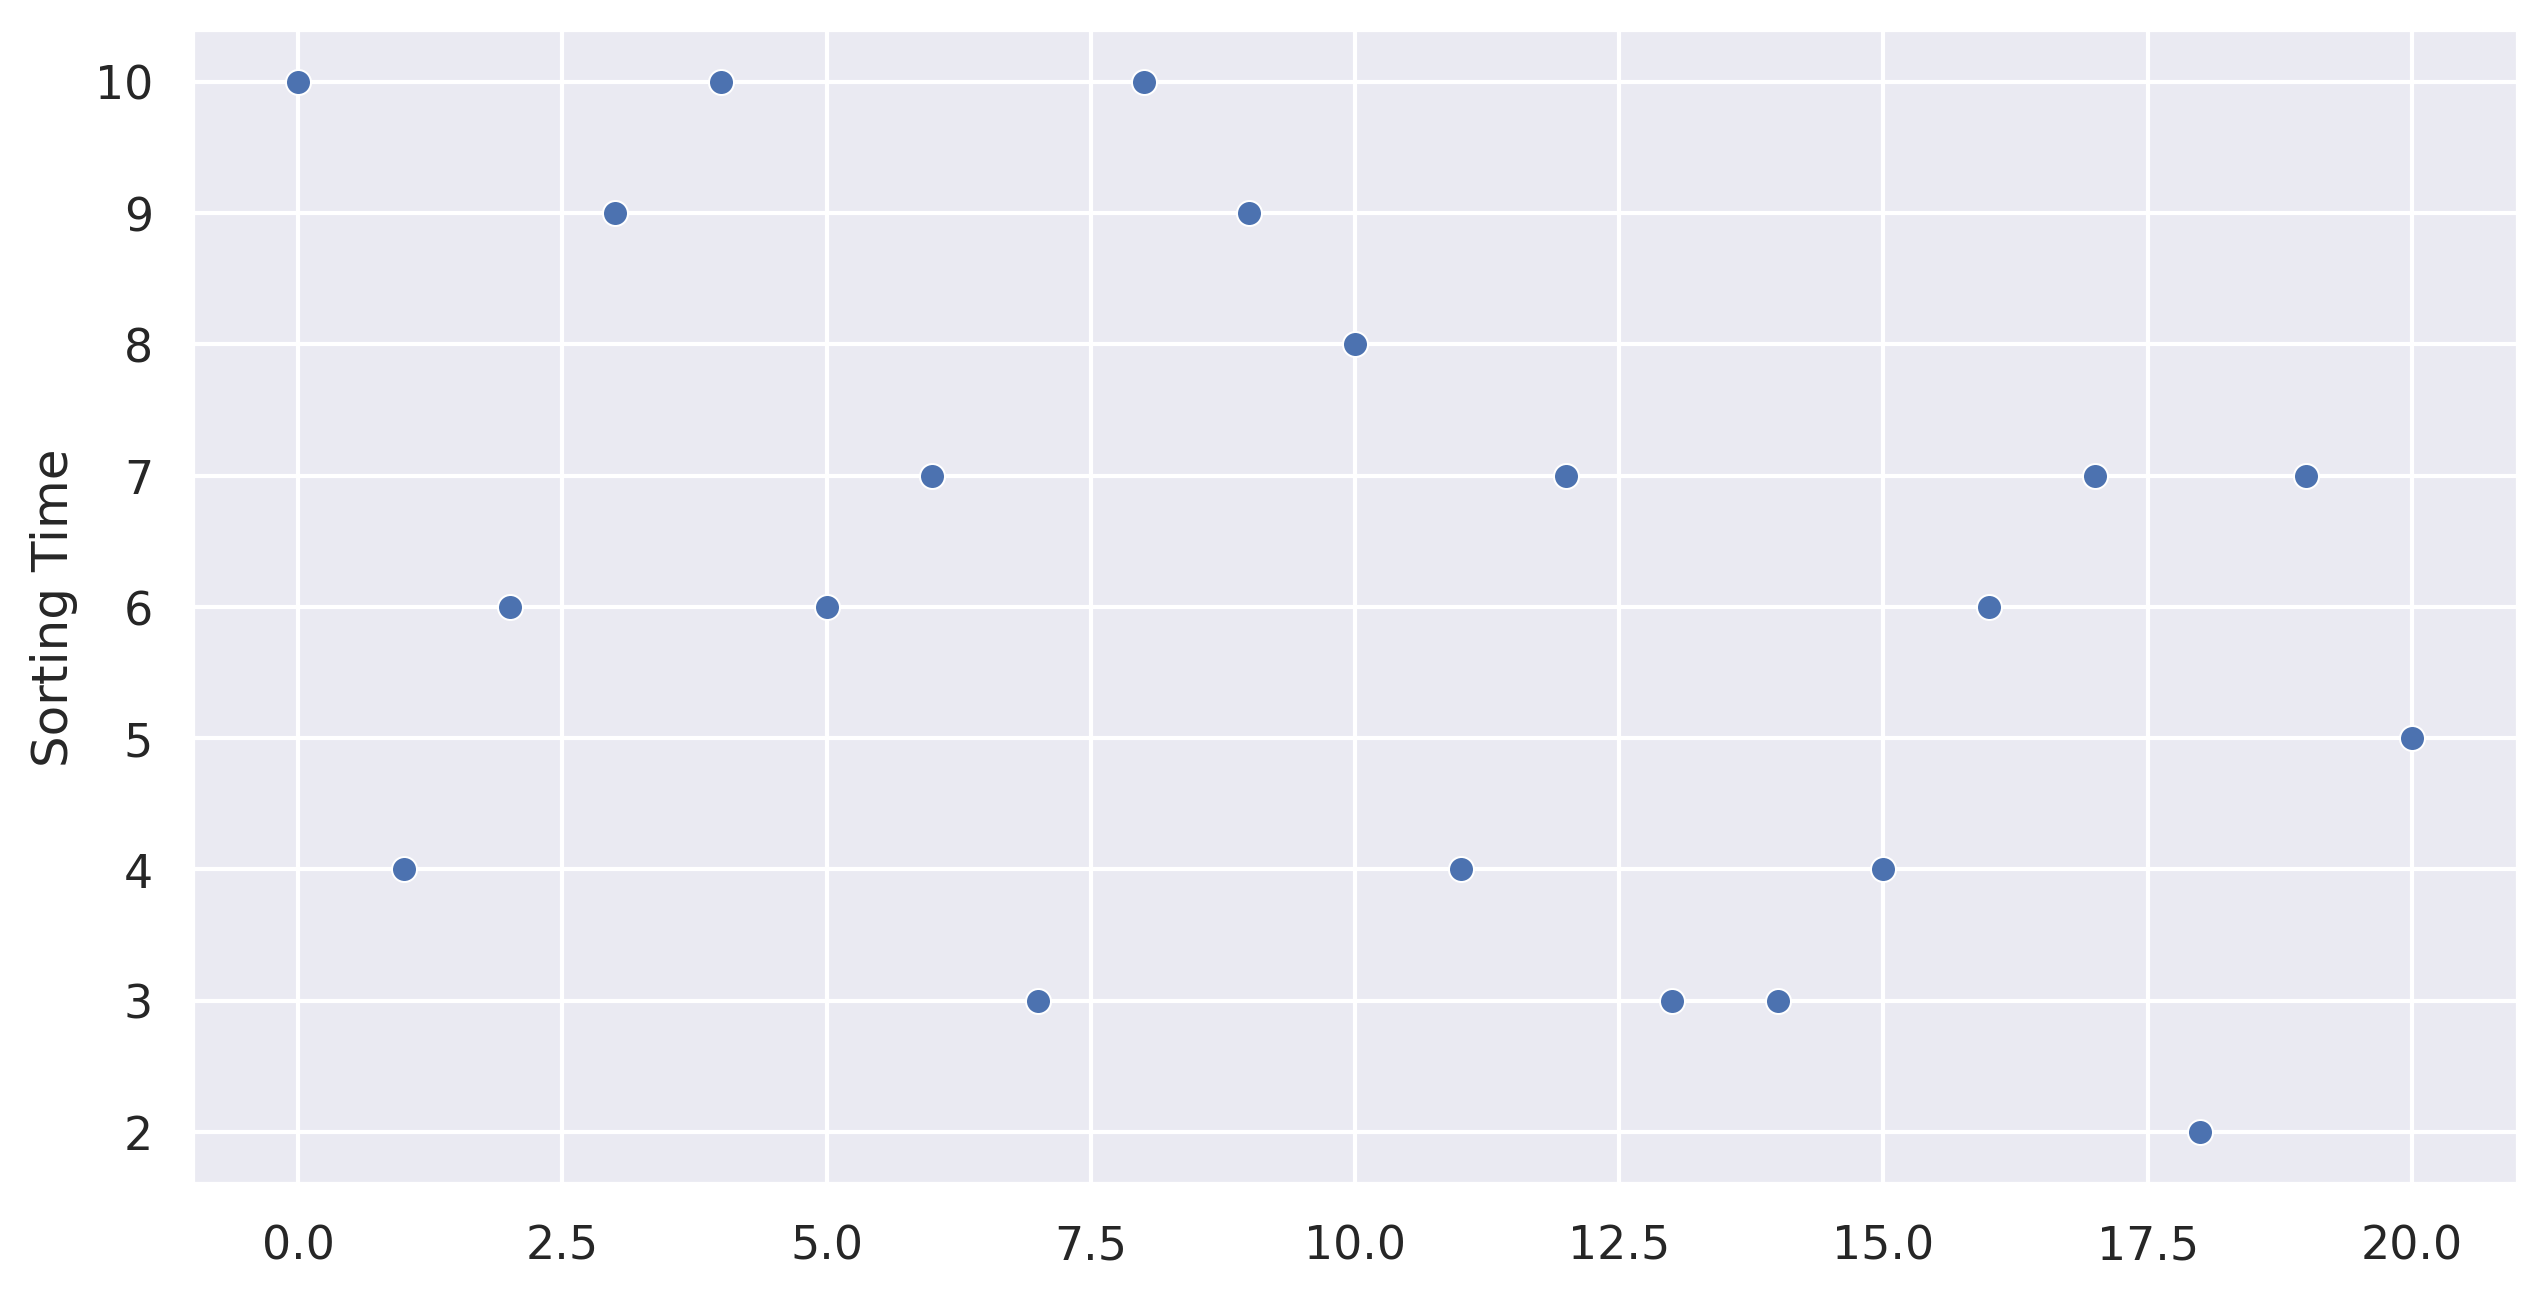

In [458]:
sns.scatterplot(df['Sorting Time'])

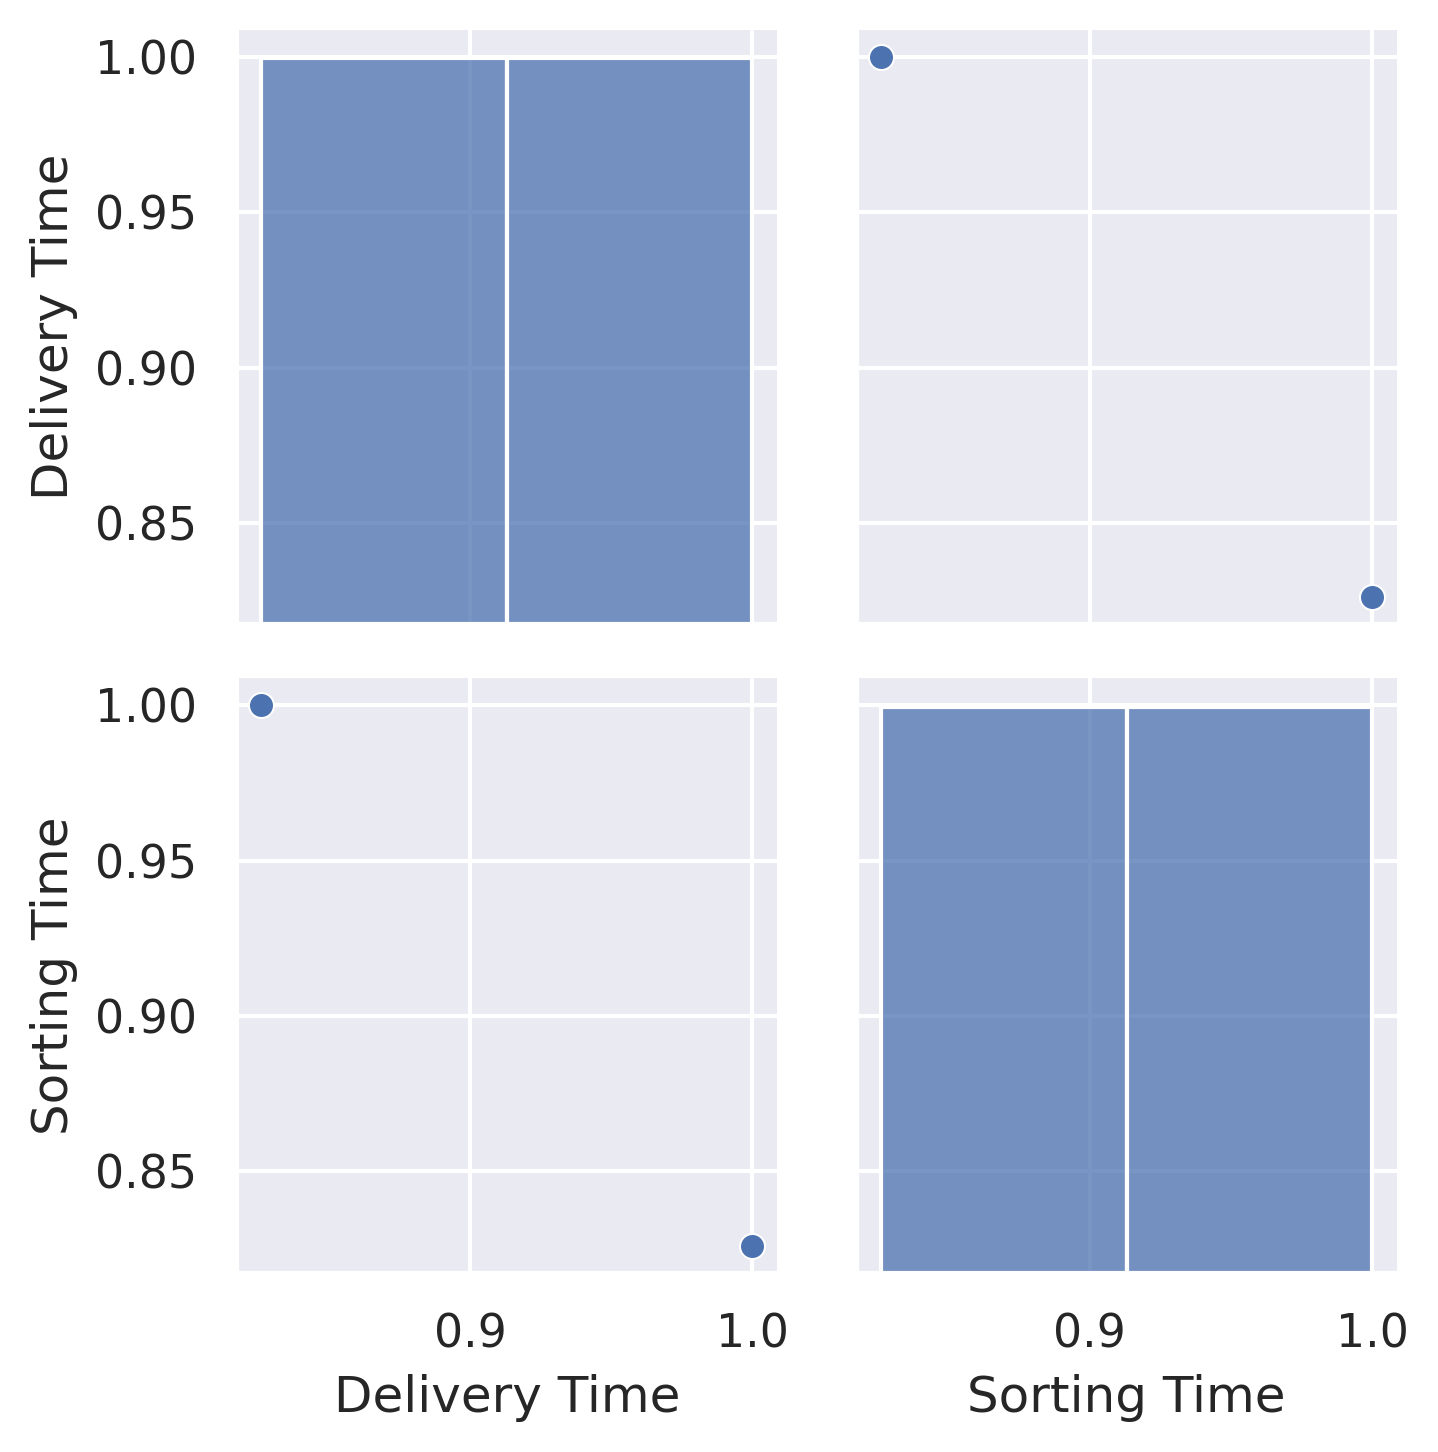

In [459]:
sns.pairplot(df.corr())
plt.tight_layout()
plt.show()

In [460]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [461]:
sc = StandardScaler()

In [462]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [463]:
scaled_df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [464]:
scaled_df

,Delivery Time,Sorting Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [465]:
scaled_df.describe()

,Delivery Time,Sorting Time
count,2.100000e+01,2.100000e+01
mean,-5.392512e-16,-7.137148e-17
std,1.024695e+00,1.024695e+00
min,-1.775019e+00,-1.689187e+00
25%,-6.644904e-01,-8.829842e-01
50%,2.097986e-01,-7.678123e-02
75%,5.974740e-01,7.294217e-01
max,2.465181e+00,1.535625e+00


In [466]:
minmax = MinMaxScaler()

In [467]:
norm_df = pd.DataFrame(minmax.fit_transform(df),columns=df.columns)
norm_df

,Delivery Time,Sorting Time
0,0.619048,1.000
1,0.261905,0.250
2,0.559524,0.500
3,0.761905,0.875
4,1.000000,1.000
5,0.350000,0.500
6,0.523810,0.625
7,0.071429,0.125
8,0.471429,1.000
9,0.511905,0.875


In [468]:
norm_df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,0.418617,0.523810
std,0.241662,0.317753
min,0.000000,0.000000
25%,0.261905,0.250000
50%,0.468095,0.500000
75%,0.559524,0.750000
max,1.000000,1.000000


<Axes: >

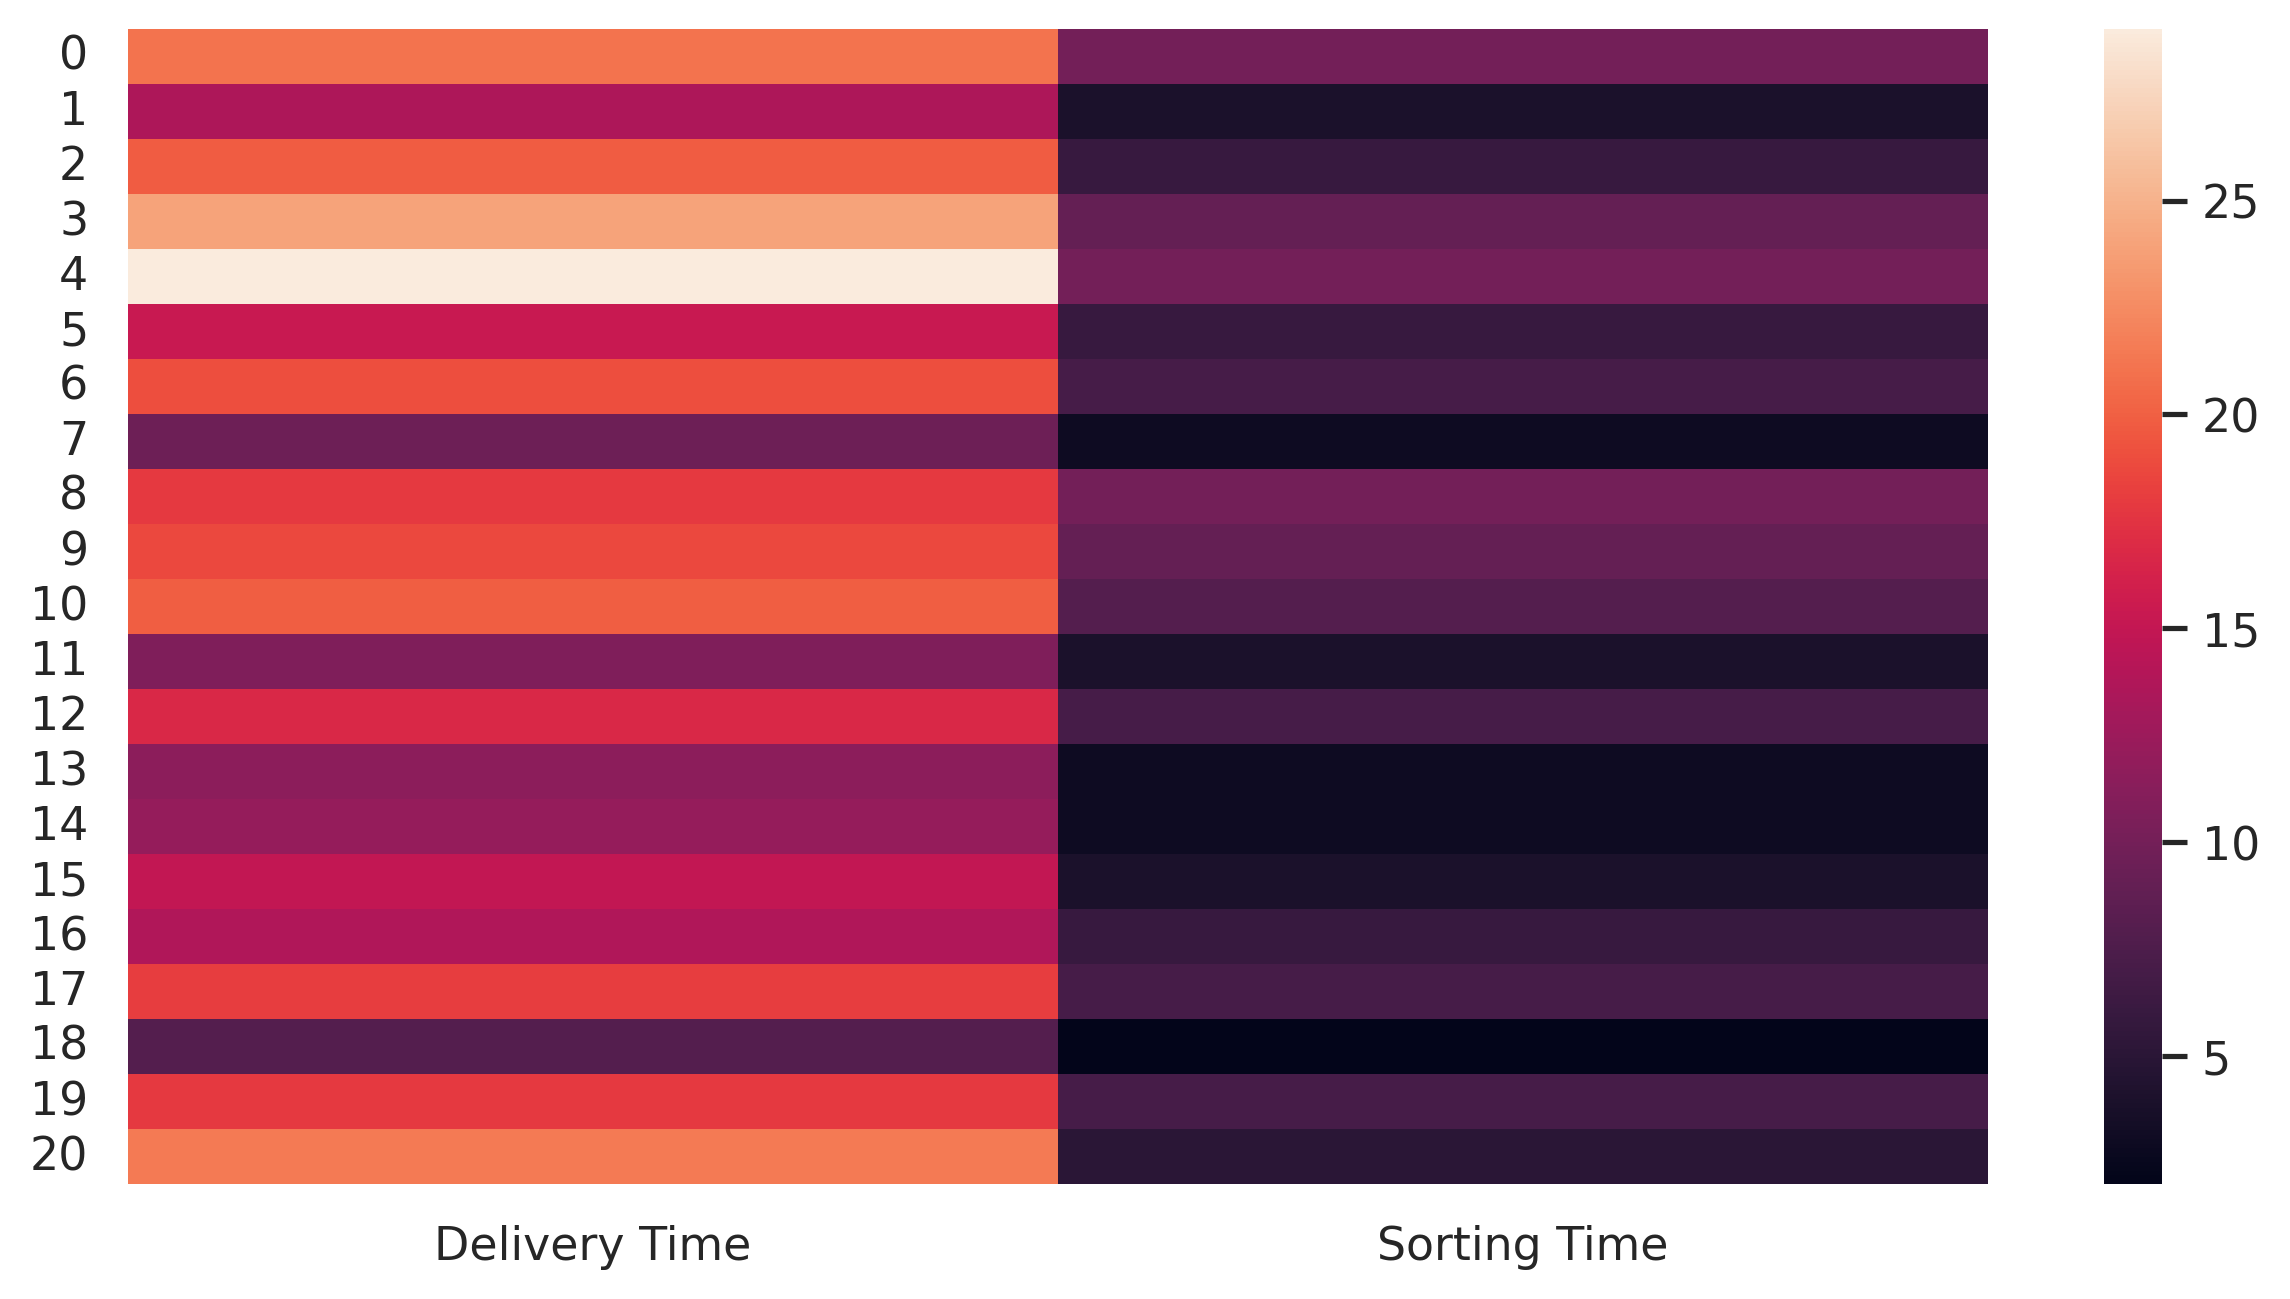

In [469]:
sns.heatmap(df)

In [470]:
#Rename The Columns
df.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, inplace=True)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<Axes: >

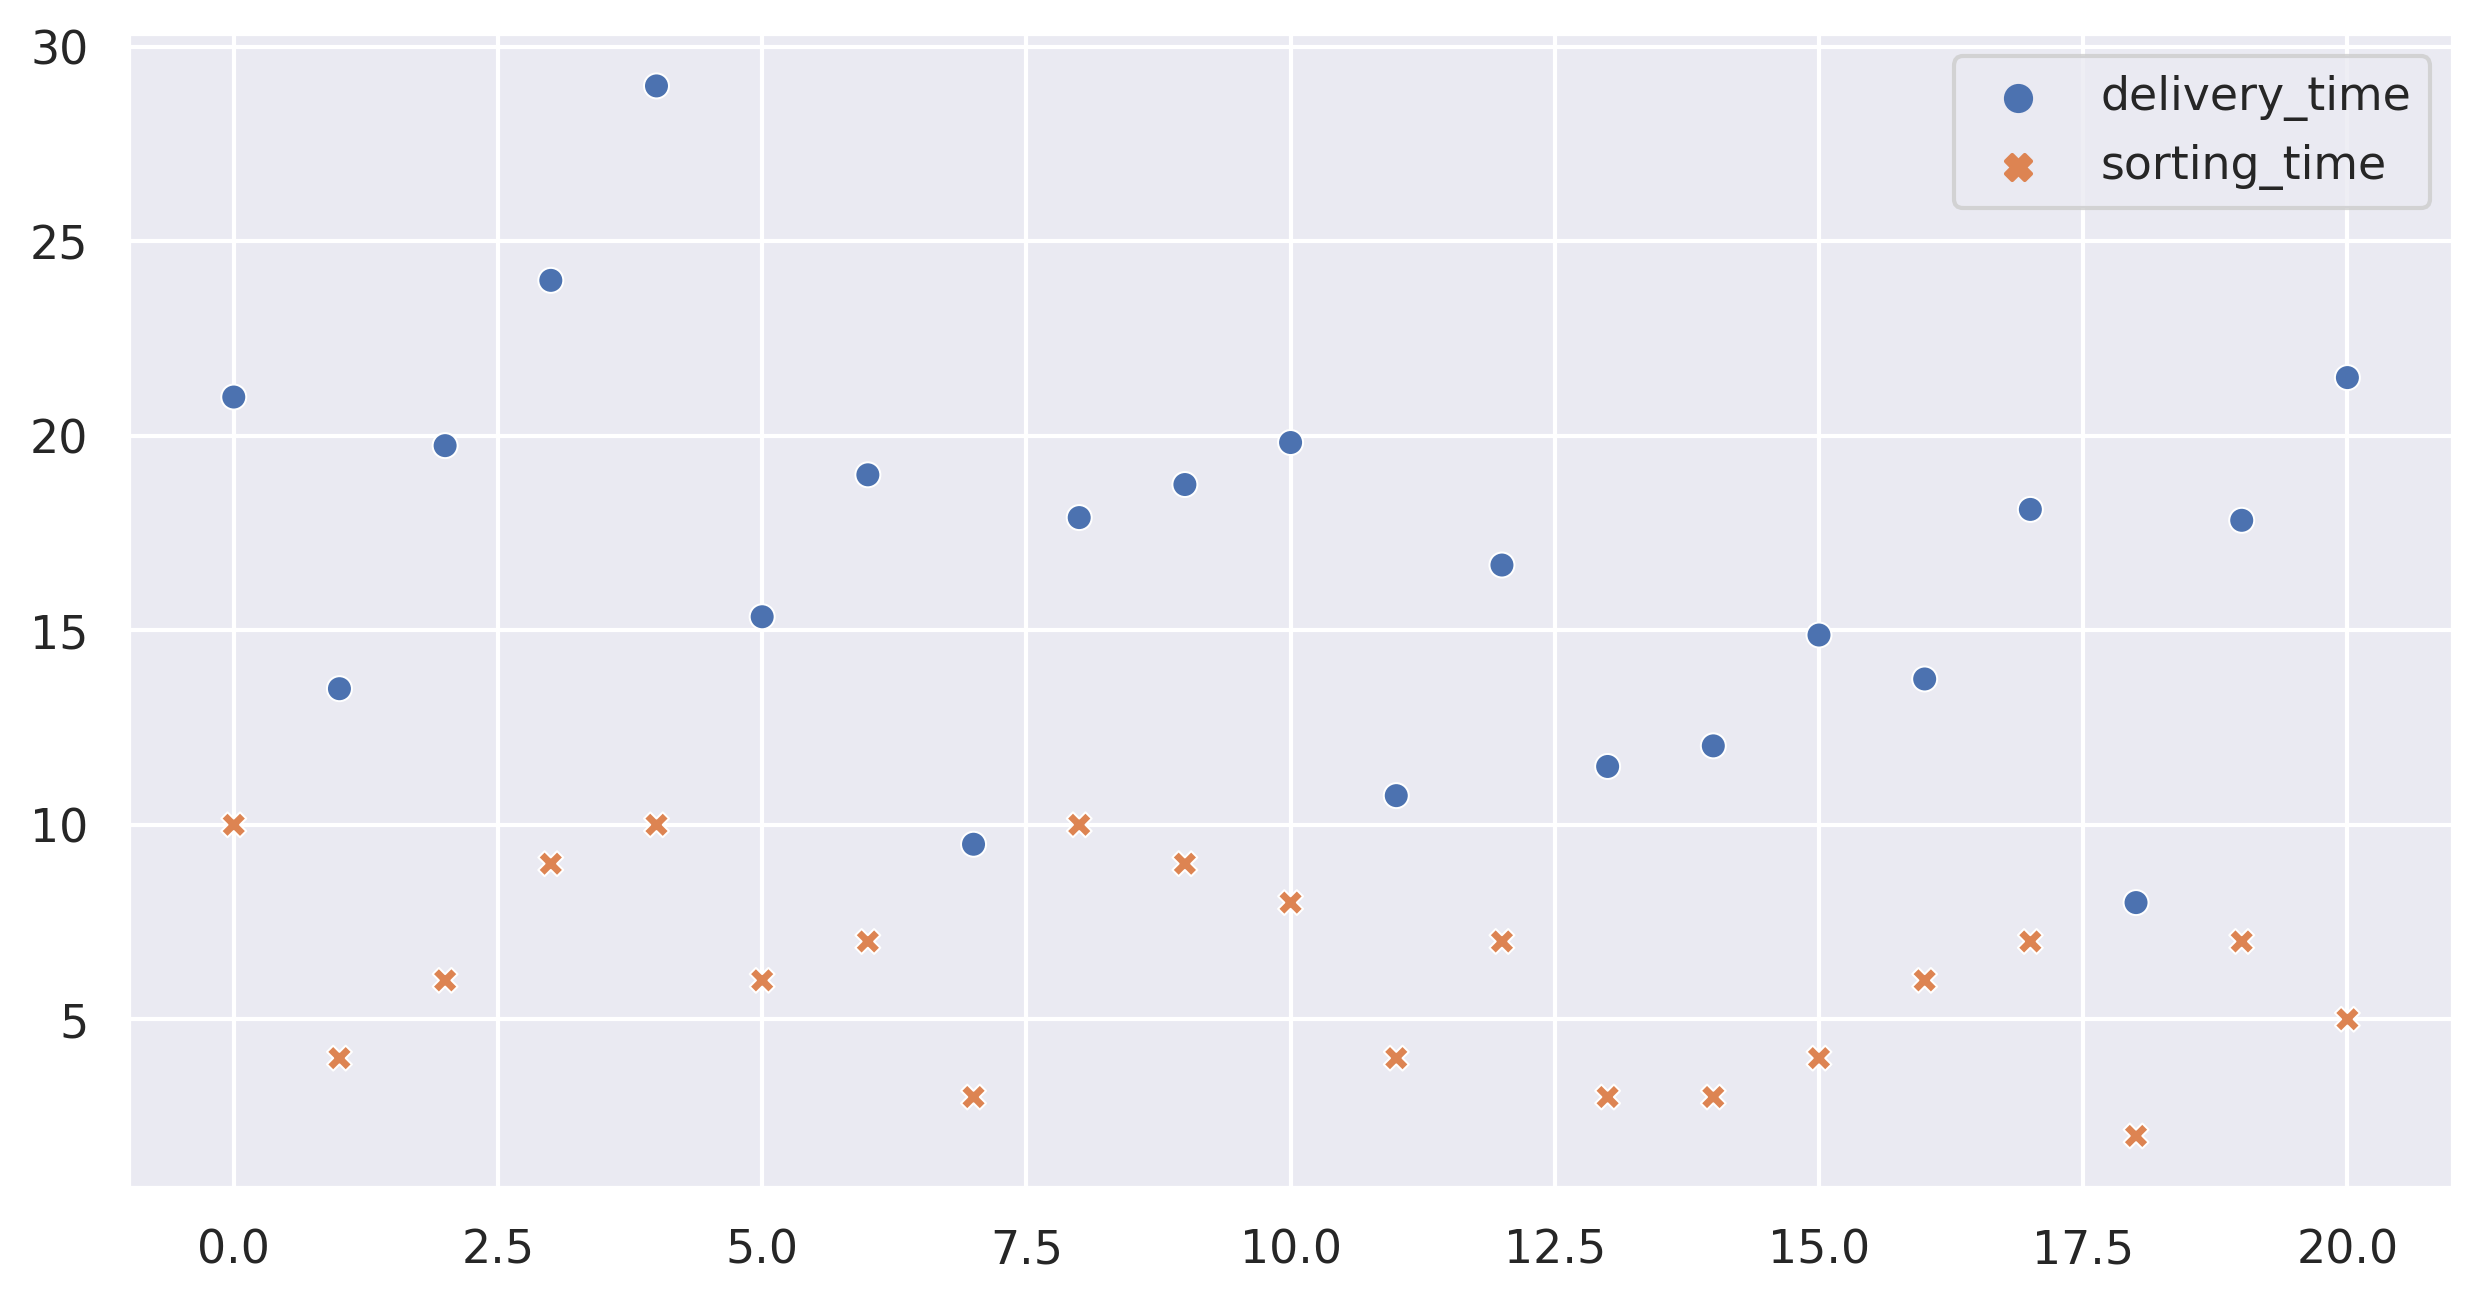

In [471]:
sns.scatterplot(df)

In [472]:
#Import Statsmodels

In [473]:
import statsmodels.formula.api as smf

In [474]:
model = smf.ols('delivery_time~sorting_time',data=df).fit()

In [475]:
#ModelParameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [476]:
df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [477]:
#Print values for tvalue and pvalue
model.pvalues , model.tvalues

(Intercept       0.001147
 sorting_time    0.000004
 dtype: float64,
 Intercept       3.823349
 sorting_time    6.387447
 dtype: float64)

In [478]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [479]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [480]:
#r2 values
model.rsquared

0.6822714748417231

In [481]:
model.rsquared_adj

0.6655489208860244

In [482]:
#Prediction for New Data
delivery_time = (6.582734 + 1.649020)*24
delivery_time

197.562096

In [483]:
new_data = pd.Series([24,48])
new_data

0    24
1    48
dtype: int64

In [484]:
df_pred = pd.DataFrame(new_data,columns=['sorting_time'])
df_pred

,sorting_time
0,24
1,48


In [485]:
model.predict(df_pred)

0    46.159211
1    85.735689
dtype: float64

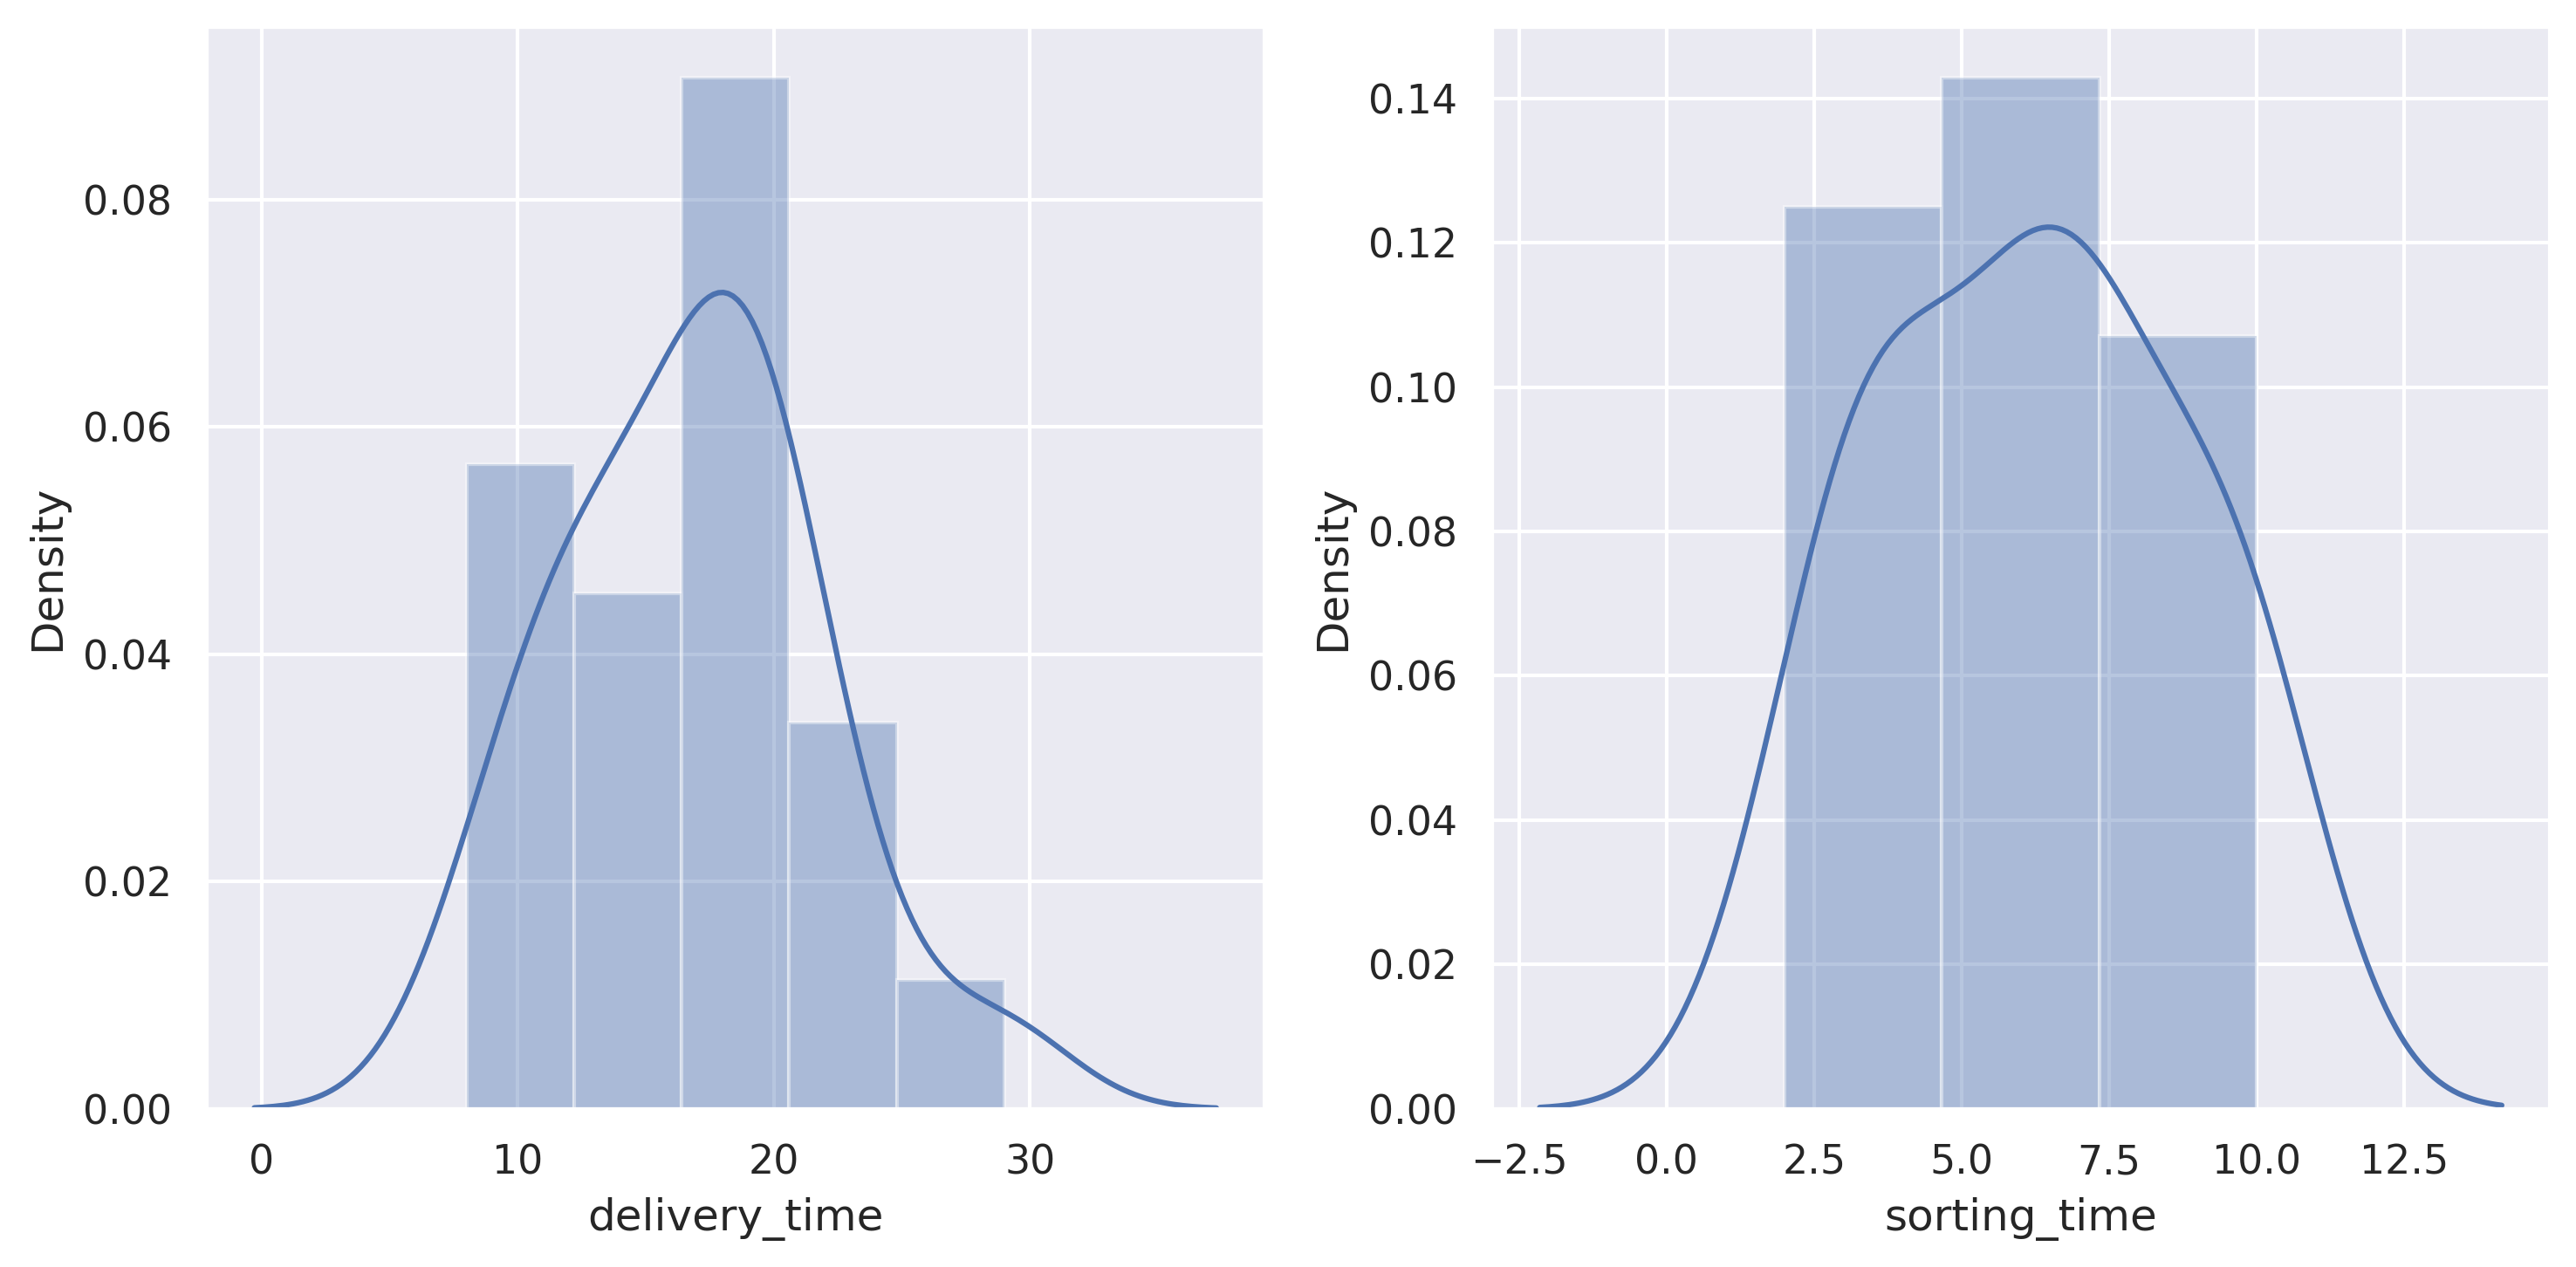

In [486]:
plt.subplot(1,2,1)
sns.distplot(df['delivery_time'])
plt.subplot(1,2,2)
sns.distplot(df['sorting_time'])
plt.tight_layout()

In [487]:
#Log Transformation
df.head(2)

,delivery_time,sorting_time
0,21.0,10
1,13.5,4


In [488]:
df['log_delivery_time'] = np.log(df['delivery_time'])
df['log_sorting_time'] = np.log(df['sorting_time'])

In [489]:
df

,delivery_time,sorting_time,log_delivery_time,log_sorting_time
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585
5,15.35,6,2.731115,1.791759
6,19.00,7,2.944439,1.945910
7,9.50,3,2.251292,1.098612
8,17.90,10,2.884801,2.302585
9,18.75,9,2.931194,2.197225


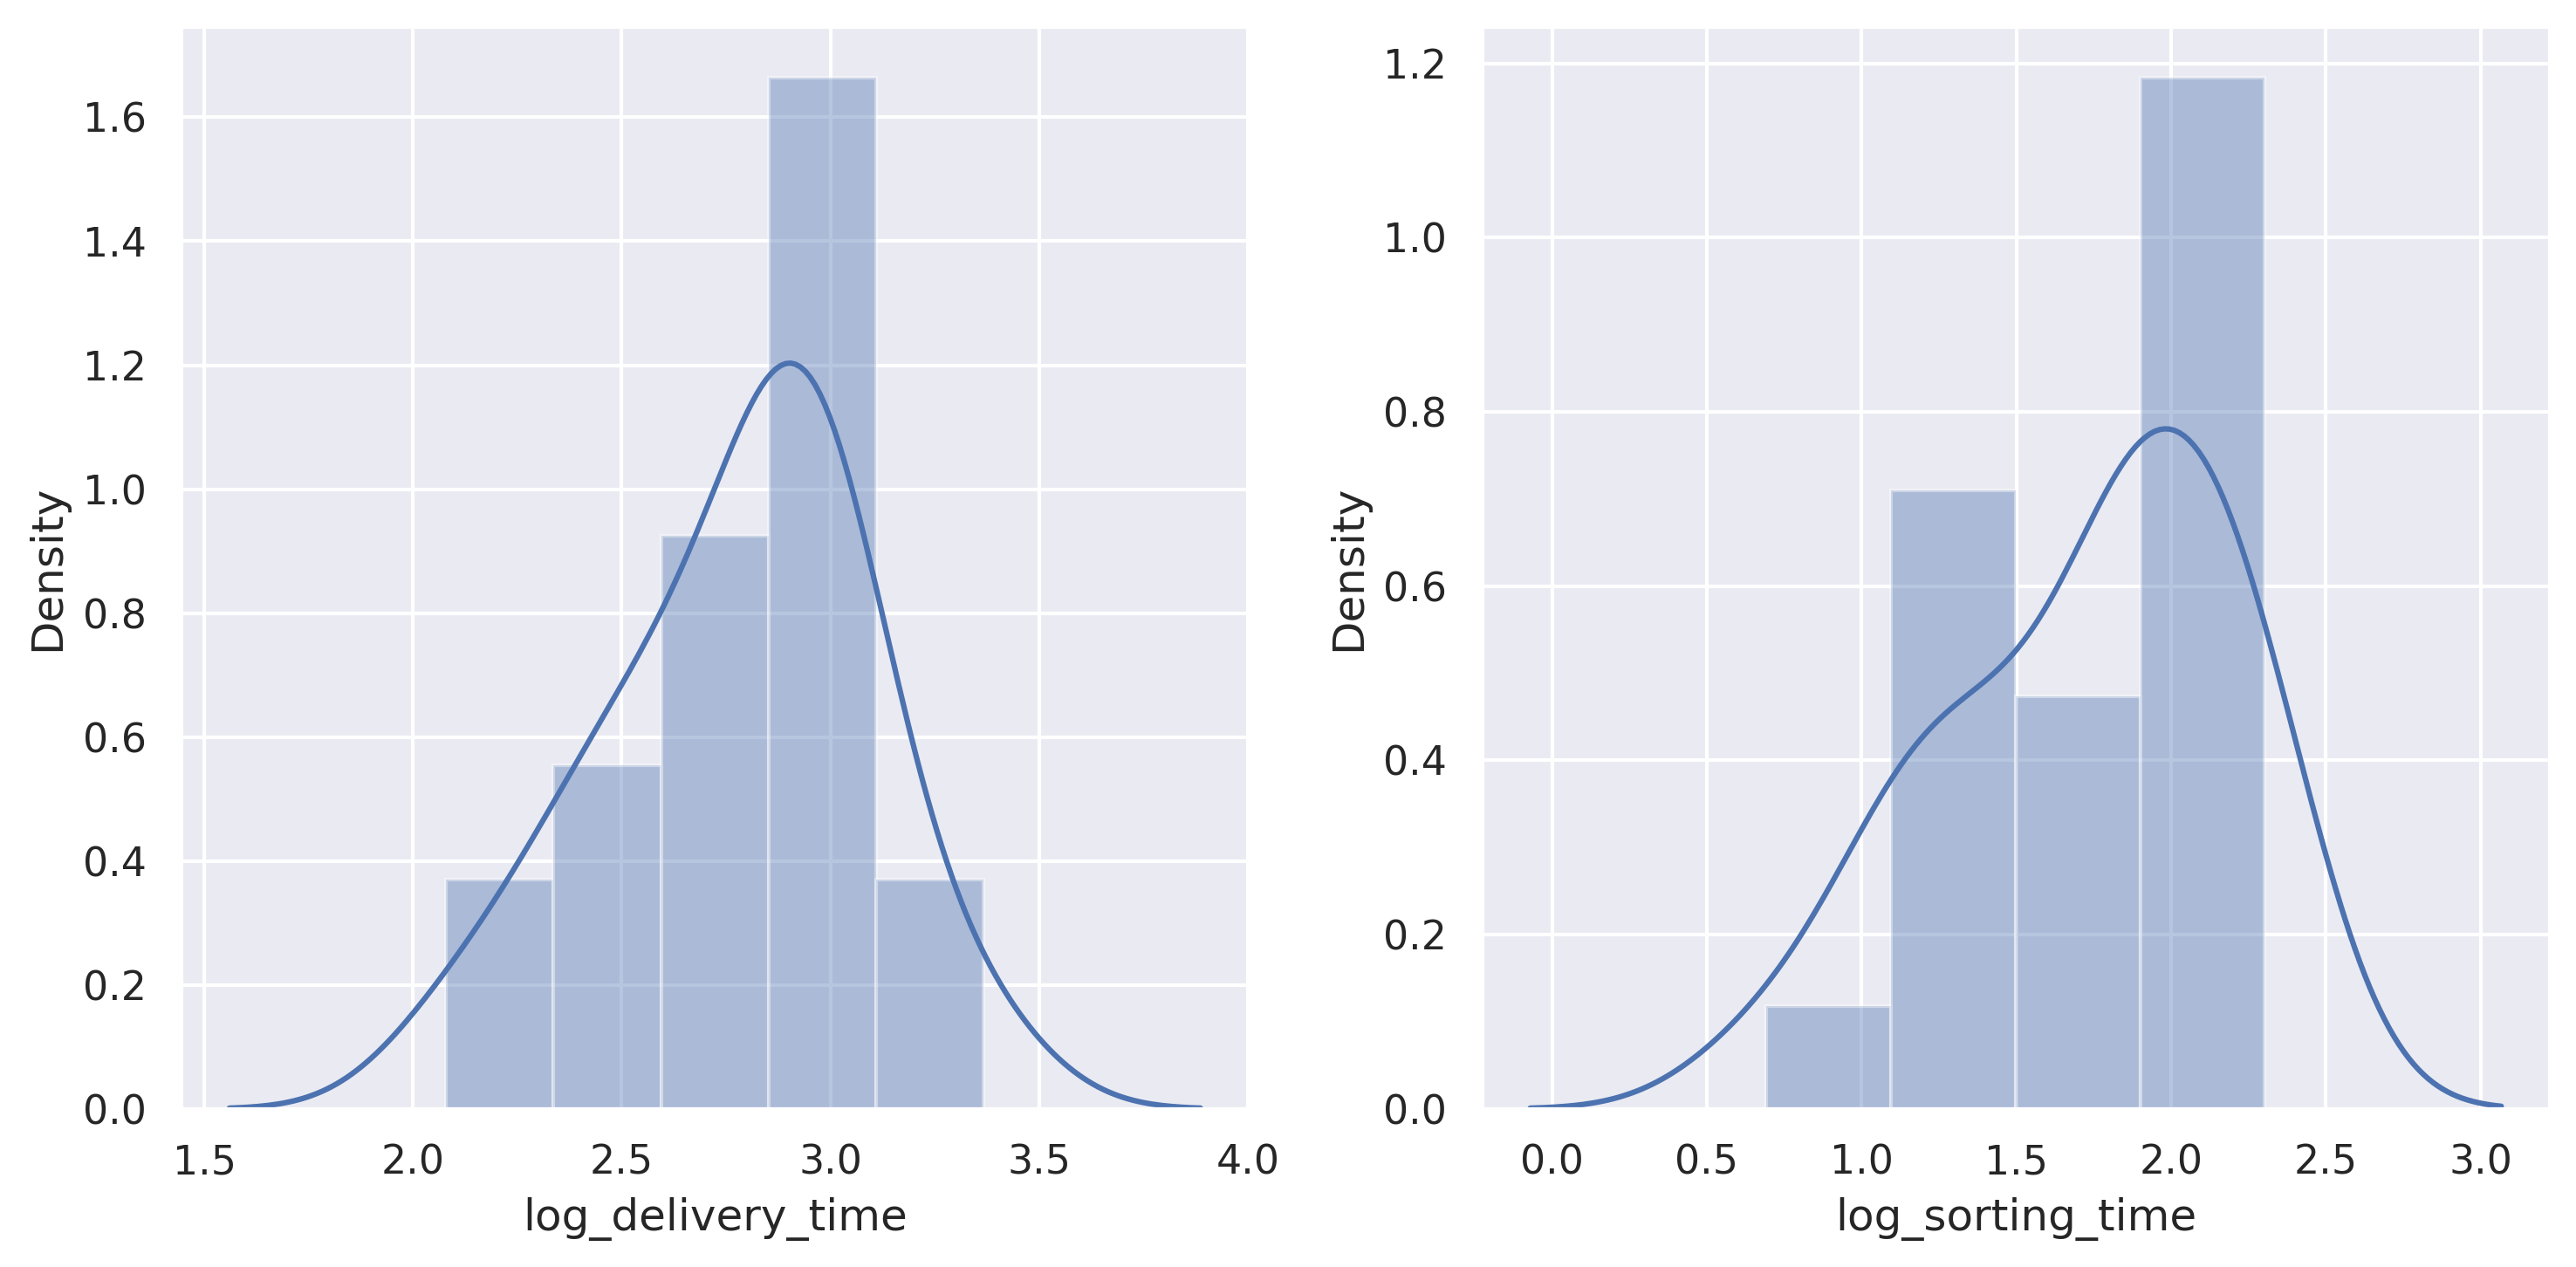

In [490]:
plt.subplot(1,2,1)
sns.distplot(df['log_delivery_time'])
plt.subplot(1,2,2)
sns.distplot(df['log_sorting_time'])
plt.tight_layout()

In [491]:
df.duplicated()
df.duplicated().sum()

0

In [492]:
df.isna()
df.isna().sum()

delivery_time        0
sorting_time         0
log_delivery_time    0
log_sorting_time     0
dtype: int64

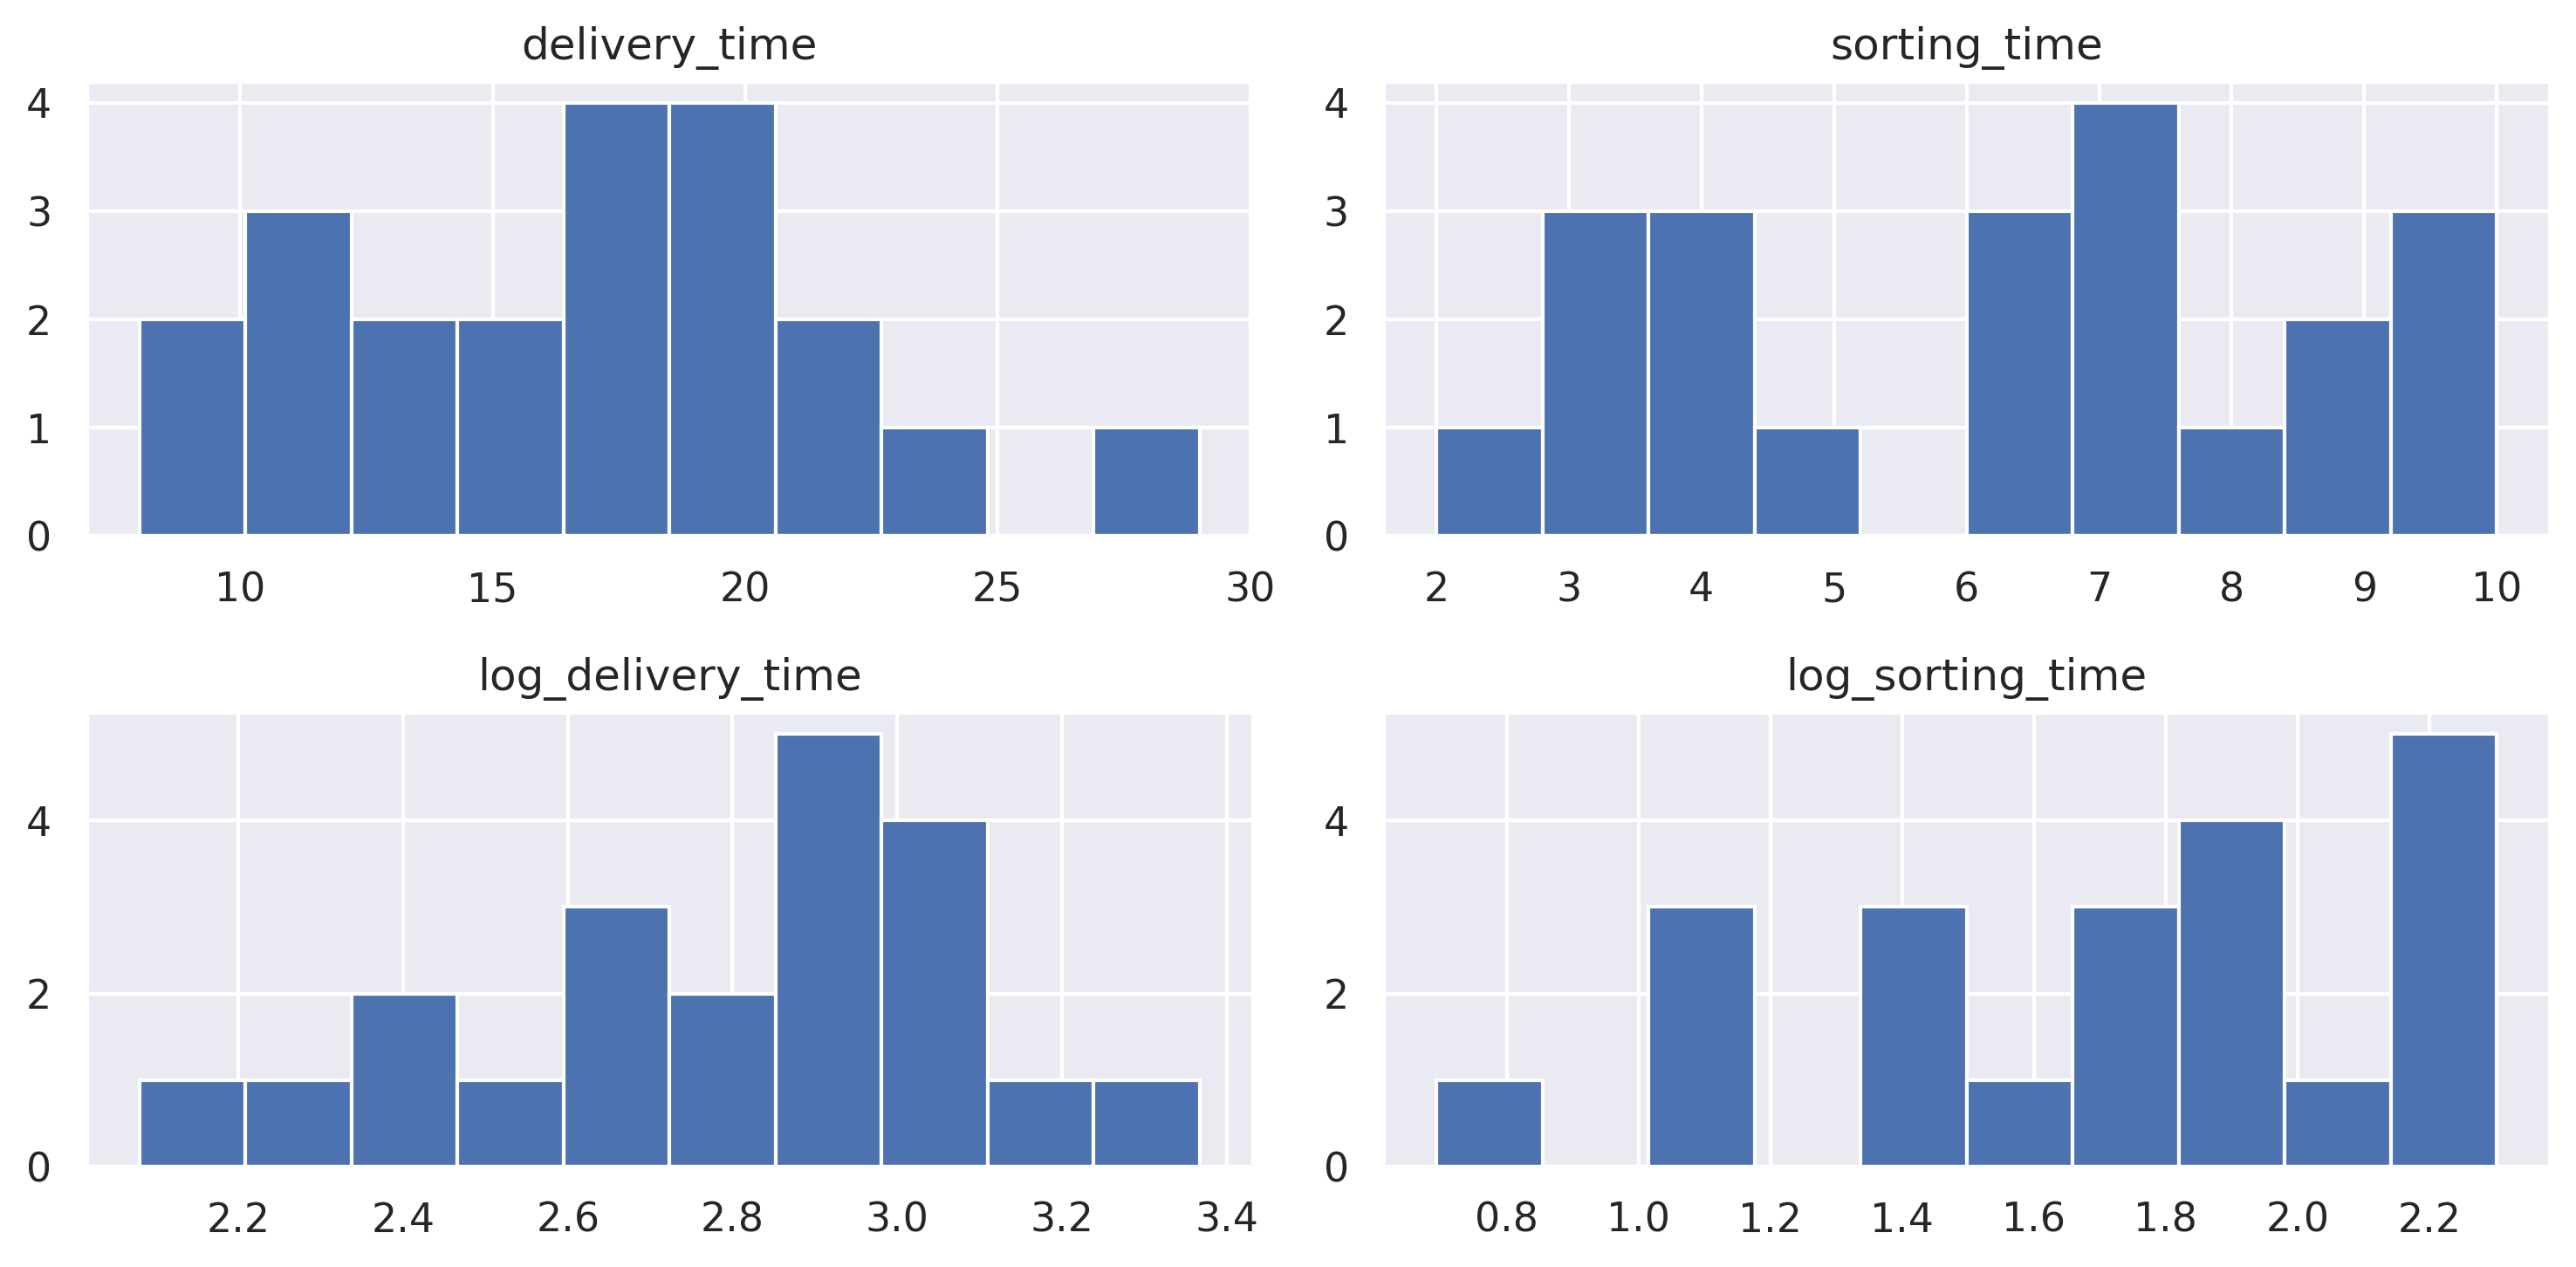

In [493]:
df.hist()
plt.tight_layout()
plt.show()

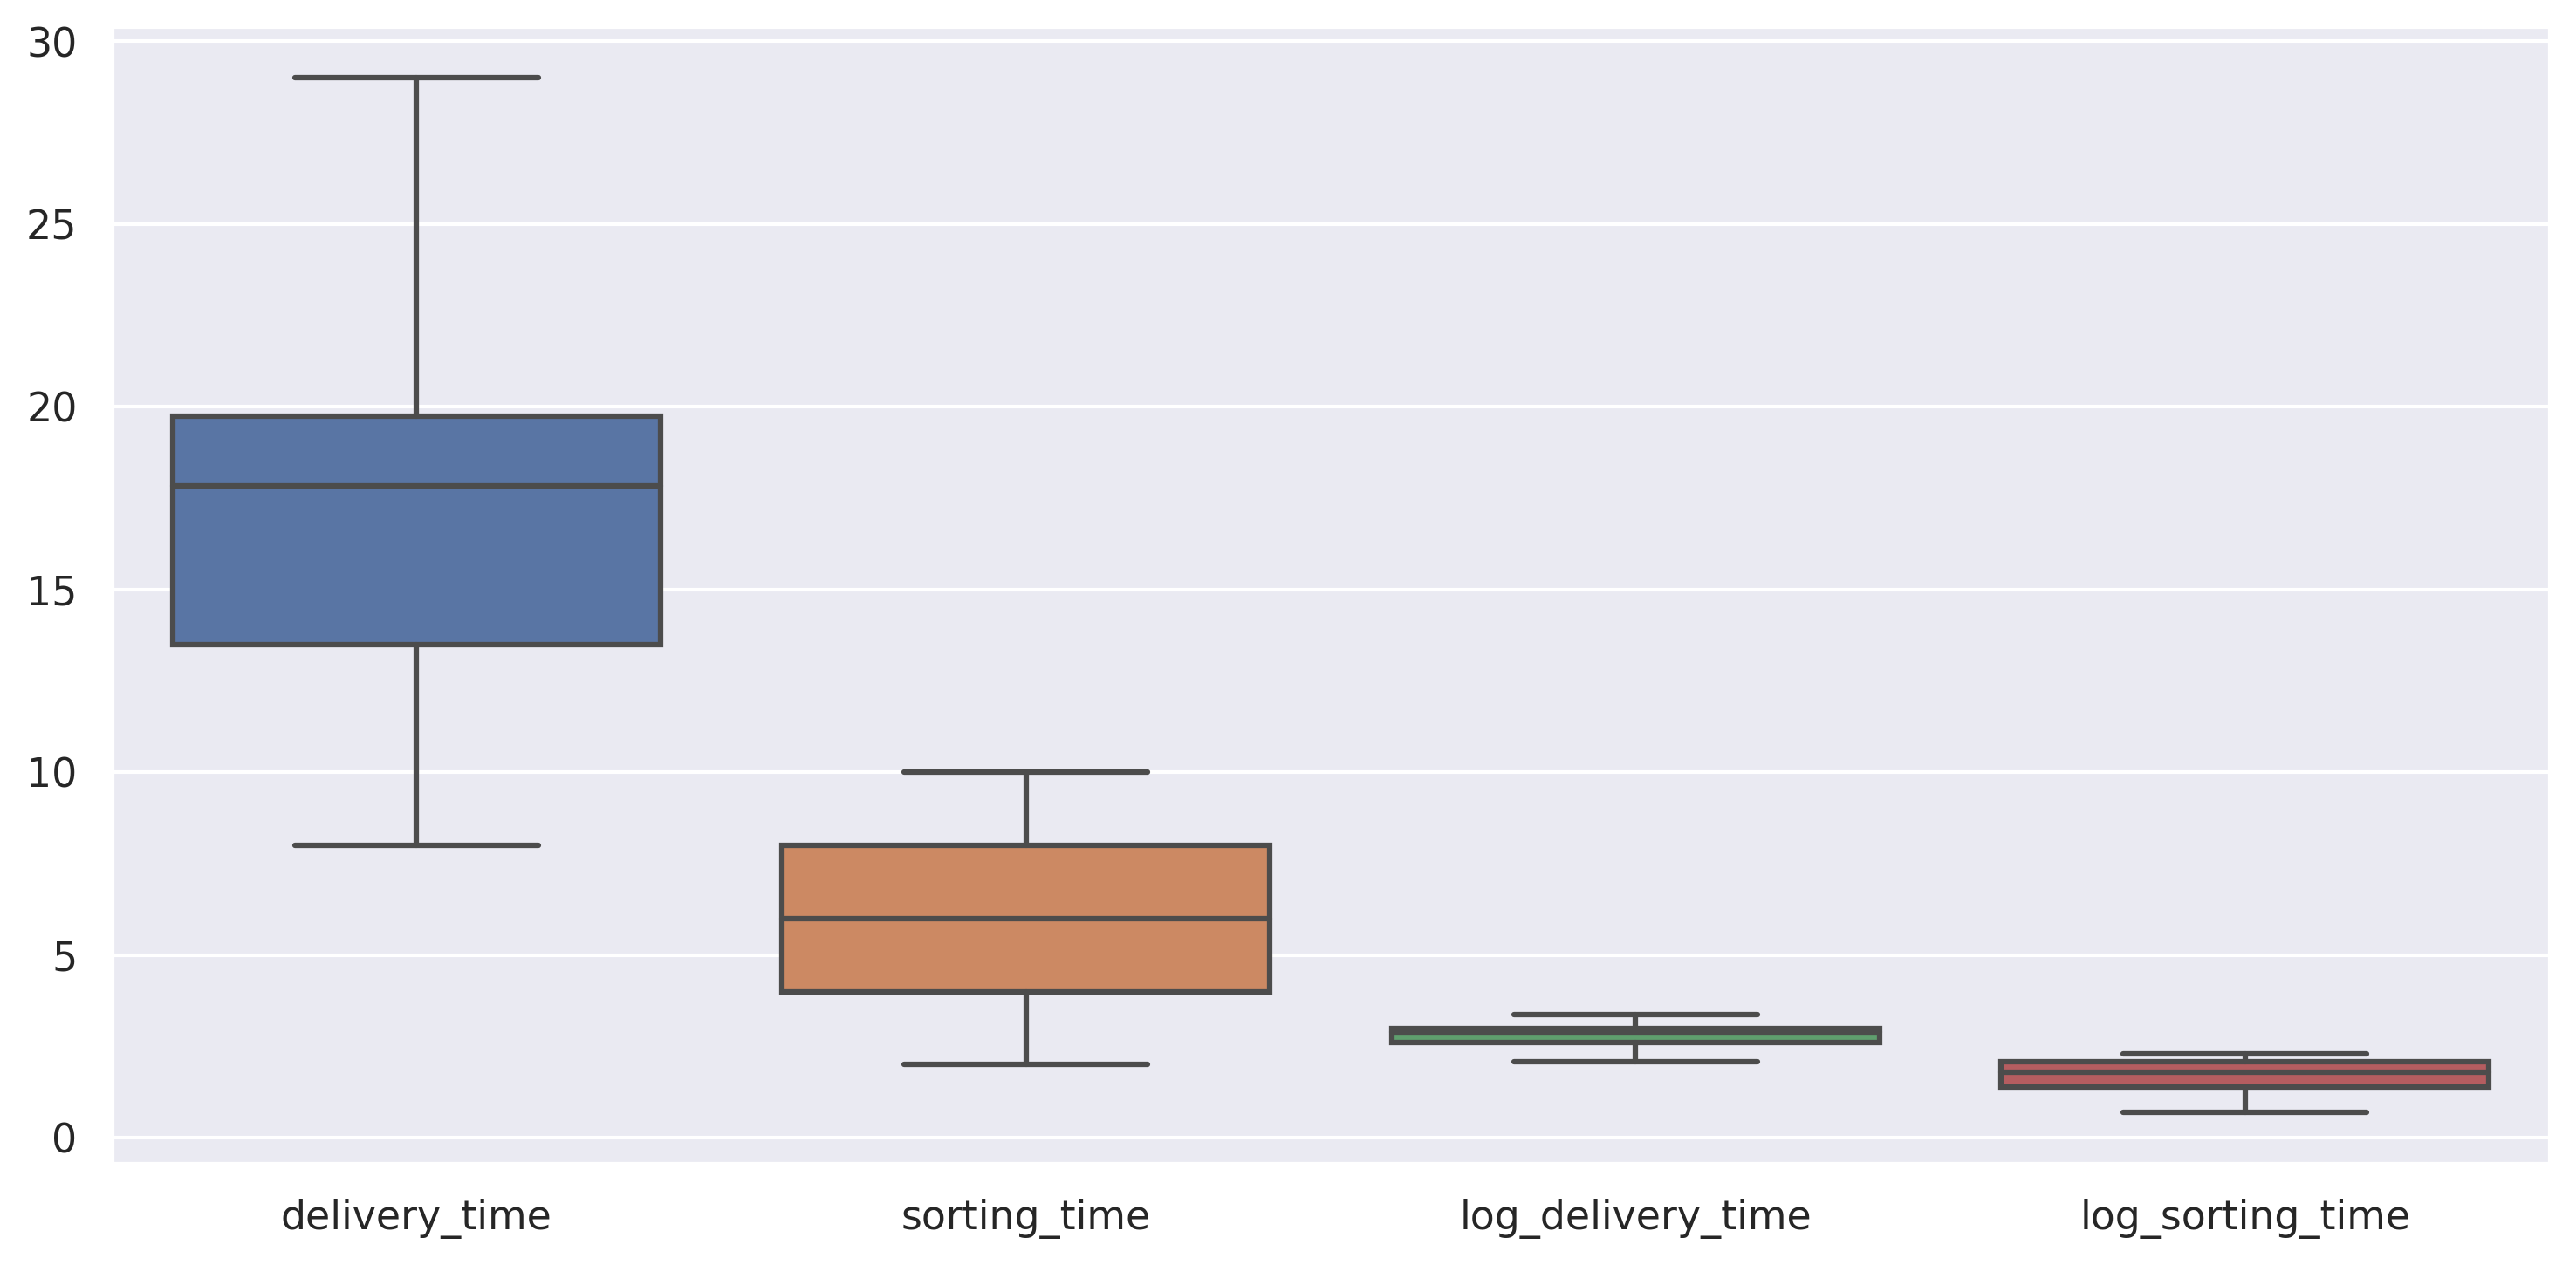

In [494]:
sns.boxplot(df)
plt.tight_layout()
plt.show()

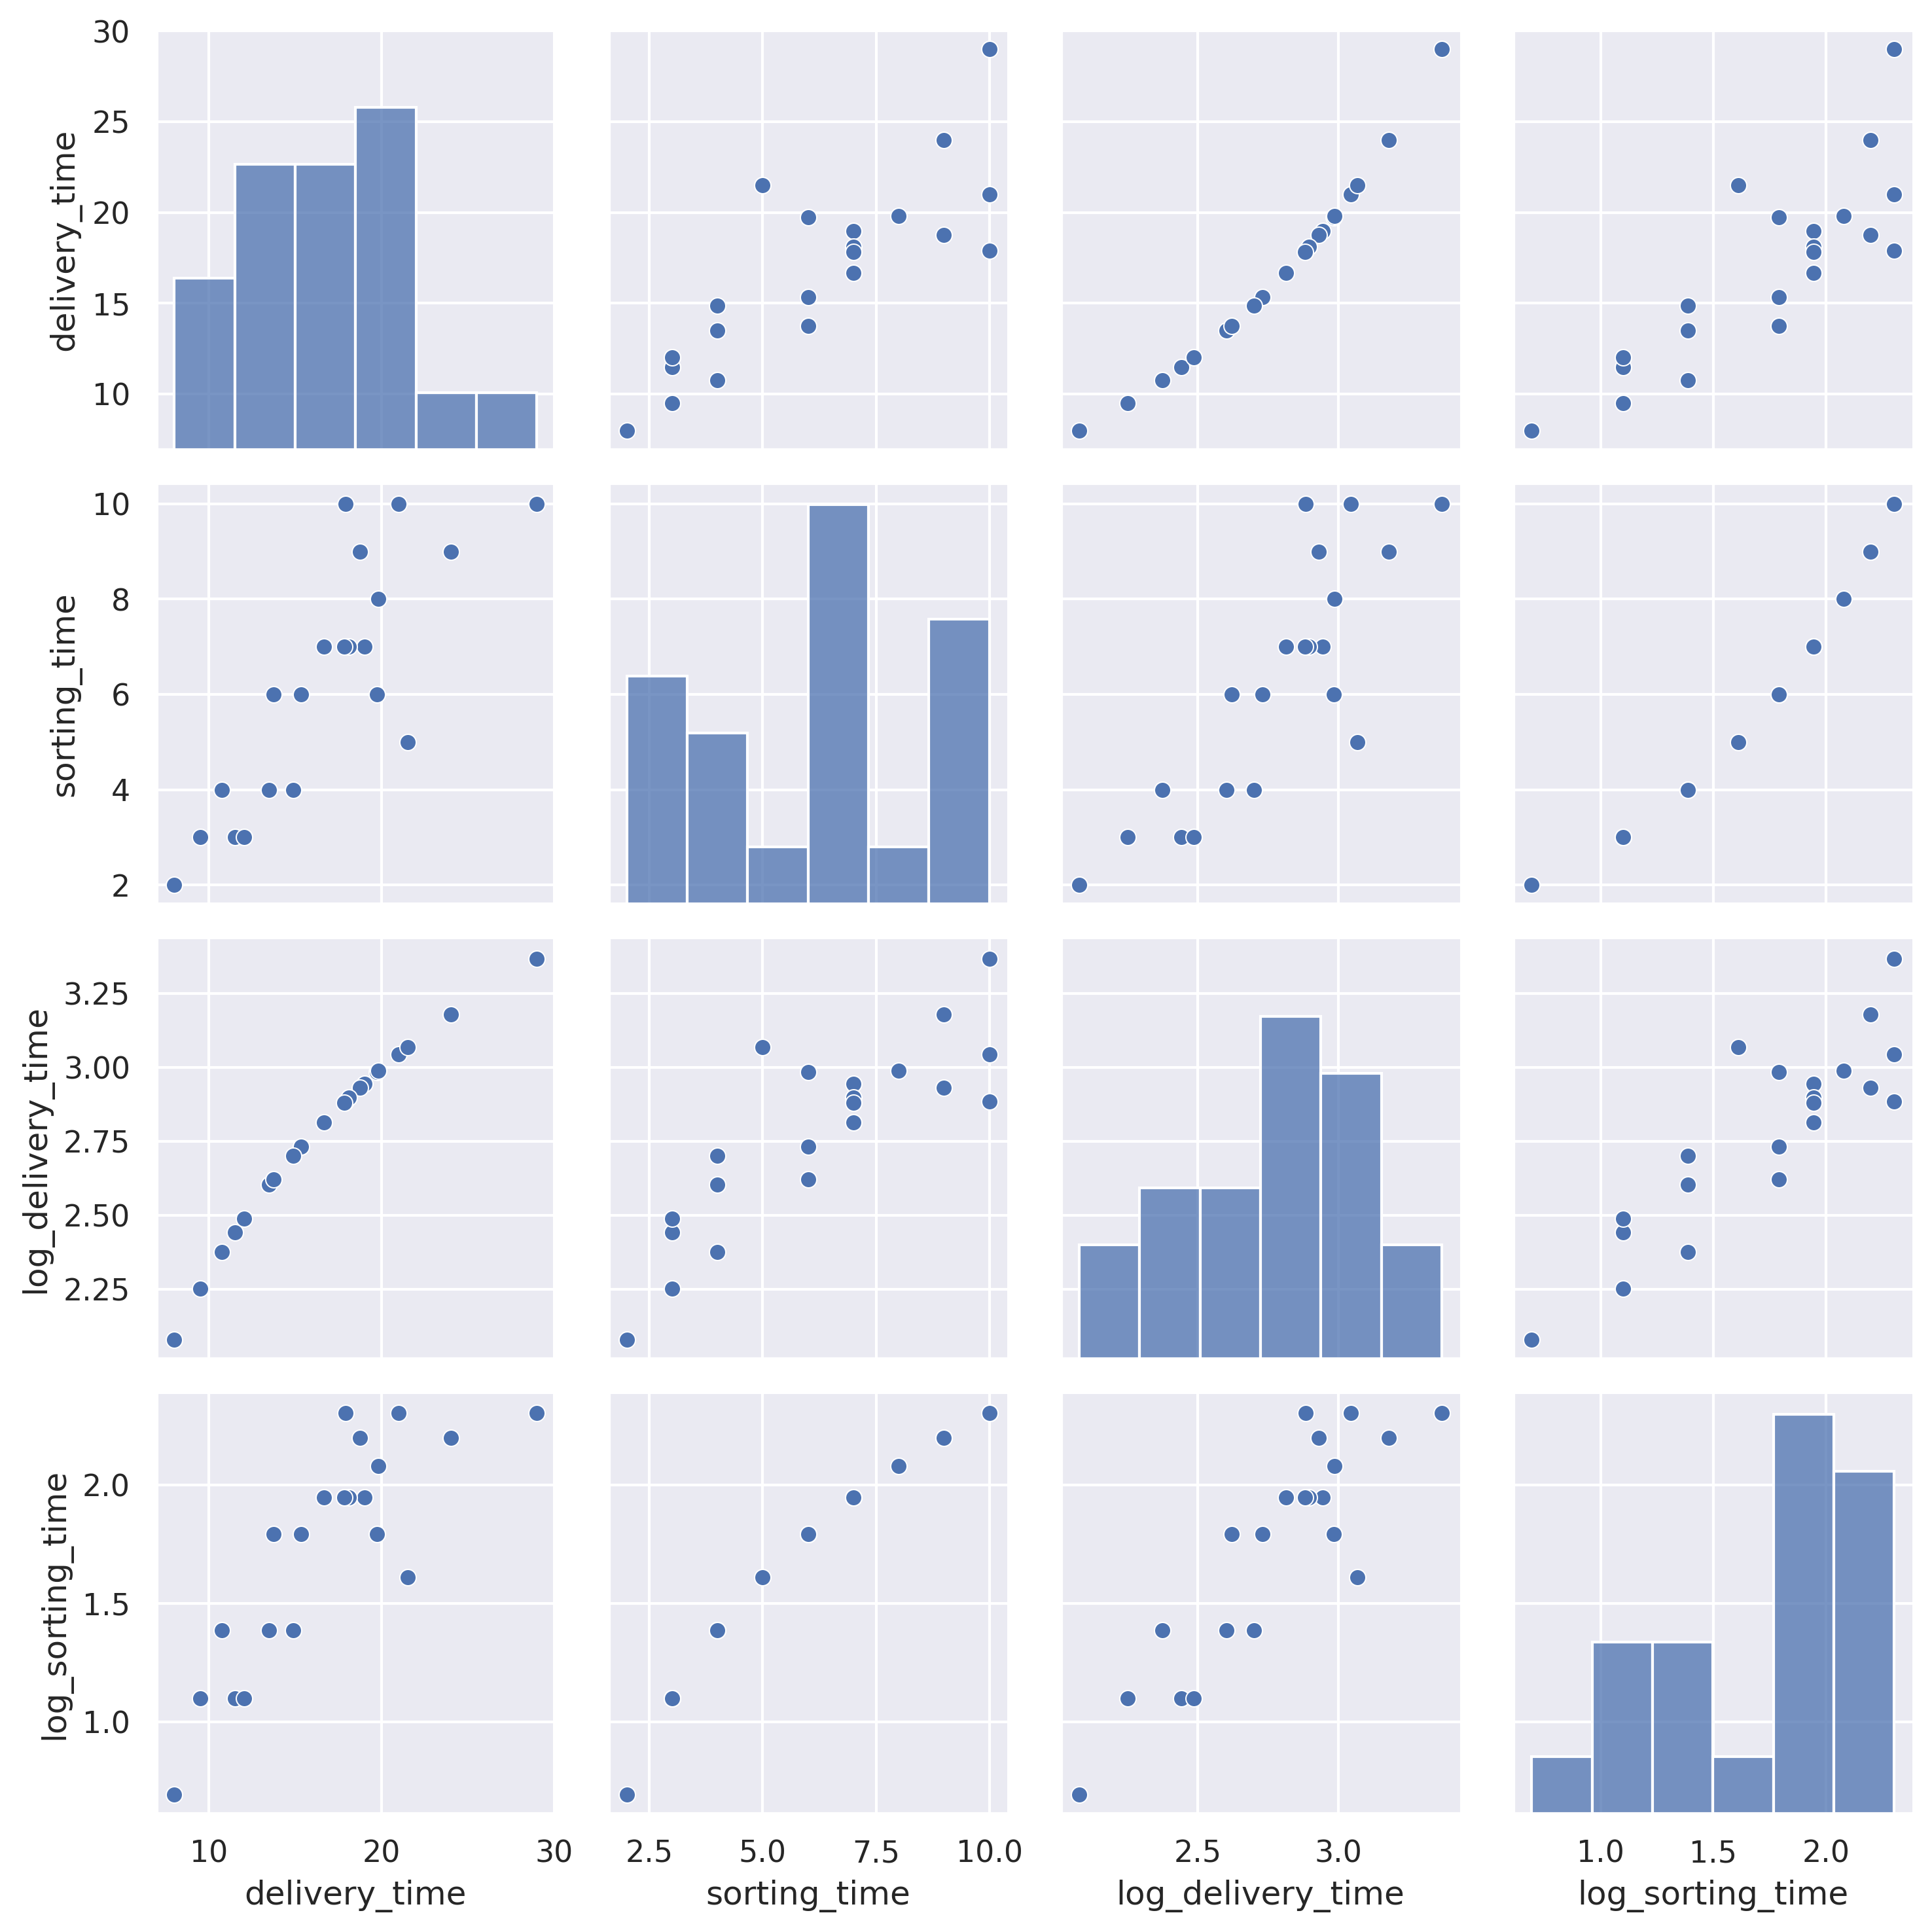

In [495]:
sns.pairplot(df)
plt.tight_layout()
plt.show()